In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict



In [3]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Data import

In [56]:
df=pd.read_csv(r'../data/training.csv')



In [57]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['Time']= df['date'].apply(lambda x:x.time())
df['Date']= df['date'].apply(lambda x:x.date())
df['Time'] =  pd.to_timedelta(str(x) for x in df['Time'])
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop('date', axis=1, inplace=True)

df.drop('HumidityRatio',inplace=True,axis=1)
df=df[df['Light']<10000] 

In [58]:
test=pd.read_csv(r'../data/test.csv')

In [59]:
test['date'] =  pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test['Time']= test['date'].apply(lambda x:x.time())
test['Date']= test['date'].apply(lambda x:x.date())
test['Time'] =  pd.to_timedelta(str(x) for x in test['Time'])
test['Date'] =  pd.to_datetime(test['Date'], format='%Y-%m-%d')
test.drop('date', axis=1, inplace=True)

test.drop('HumidityRatio',inplace=True,axis=1)


In [60]:
df['Holidays'] = df['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )
test['Holidays'] = test['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )

In [ ]:
test['date'] =  pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test['Time']= test['date'].apply(lambda x:x.time())
test['Date']= test['date'].apply(lambda x:x.date())
test['Time'] =  pd.to_timedelta(str(x) for x in test['Time'])
test['Date'] =  pd.to_datetime(test['Date'], format='%Y-%m-%d')
test.drop('date', axis=1, inplace=True)

test.drop('HumidityRatio',inplace=True,axis=1)

# k Nearest Neighbor

In [61]:
attributes = ['Temperature','CO2','Light','Humidity'] 

    
X_train =df[attributes].values
y_train=df['Occupancy'].values
X_test=test[attributes].values
y_test=test['Occupancy'].values

attributes

['Temperature', 'CO2', 'Light', 'Humidity']

In [62]:
from sklearn.neighbors import KNeighborsClassifier

## optimal K?

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Creating odd list K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring =
    "accuracy")
    cv_scores.append(scores.mean())

In [65]:
# Changing to mis classification error
mse = [1-x for x in cv_scores]
# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 13


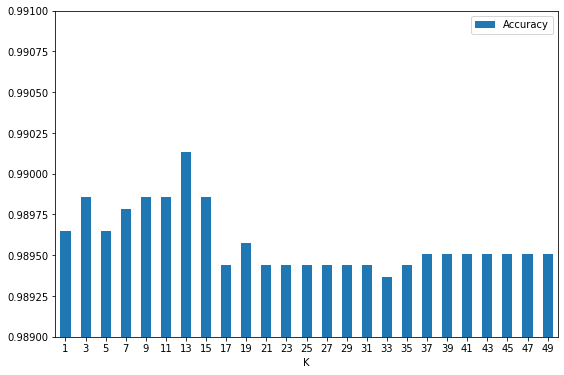

In [72]:
import matplotlib.pyplot as plt
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,50,2)], "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6),ylim=(0.989,0.991),rot=0)
    plt.show()
plot_accuracy(cv_scores)

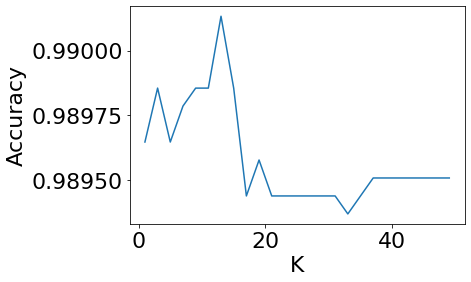

In [68]:
plt.plot(range(1,50,2), cv_scores)
plt.ylabel('Accuracy', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## classification

Prova diverse combinazioni wight algorithm n_neighbors

In [51]:
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9902723735408561
F1-score [0.99365079 0.97920998]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      0.99      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [52]:
clf = KNeighborsClassifier(n_neighbors=11, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9965953307392996
F1-score [0.99778504 0.99264448]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      1.00      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      1.00      1.00      6168
weighted avg       1.00      1.00      1.00      6168



In [111]:
clf = KNeighborsClassifier(n_neighbors=11, weights='distance', algorithm='ball_tree')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9965953307392996
F1-score [0.99778504 0.99264448]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      1.00      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      1.00      1.00      6168
weighted avg       1.00      1.00      1.00      6168



### Cross Validation

In [112]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.9900 (+/- 0.002)
F1-score: 0.9861 (+/- 0.003)


### Grid Search

In [73]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [100]:
parameters = {'n_neighbors': np.arange(1, 25,1), 'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
clf = search.best_estimator_

In [102]:
y_score=clf.predict_proba(X_test)

In [103]:
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9965953307392996
F1-score [0.99778598 0.99263416]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4747
           1       0.99      1.00      0.99      1421

    accuracy                           1.00      6168
   macro avg       0.99      1.00      1.00      6168
weighted avg       1.00      1.00      1.00      6168



In [104]:
search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## EVALUATION

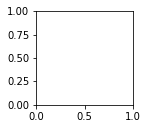

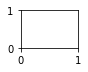

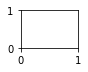

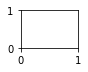

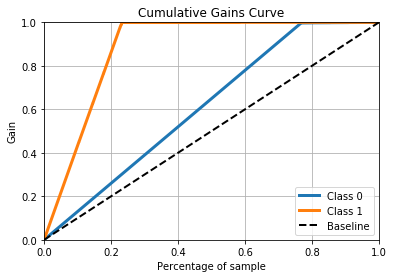

In [99]:
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (5, 5)

plt.subplot2grid(fig_dims, (1, 1))
plot_precision_recall(y_test, y_score)

plt.subplot2grid(fig_dims, (0, 0))
plot_roc(y_test, y_score)


plt.subplot2grid(fig_dims, (0, 1))
plot_lift_curve(y_test, y_score)

plt.subplot2grid(fig_dims, (1, 0))
plot_cumulative_gain(y_test, y_score)



plt.show()

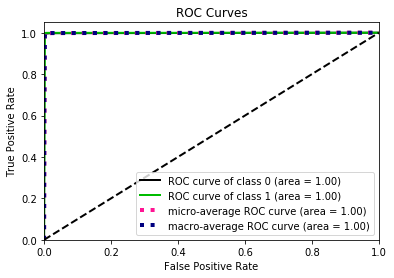

In [87]:
plot_roc(y_test, y_score)
plt.show()

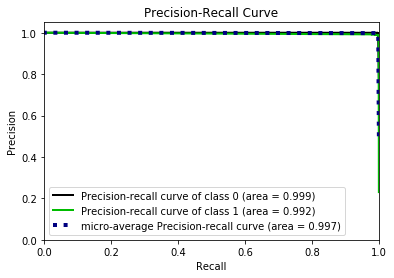

In [38]:
plot_precision_recall(y_test, y_score)
plt.show()

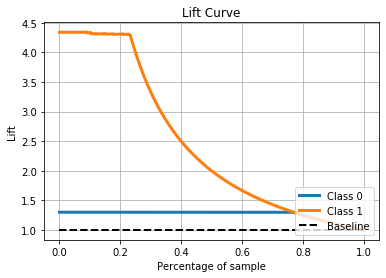

In [39]:

plot_lift_curve(y_test, y_score)
plt.show()

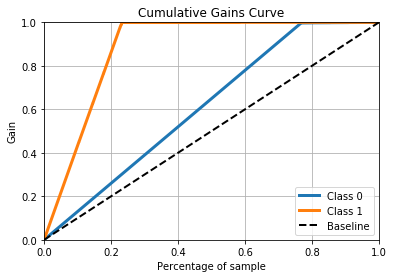

In [40]:
plot_cumulative_gain(y_test, y_score)
plt.show()

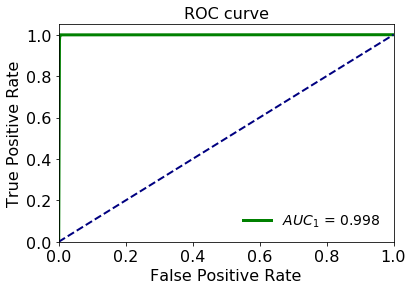

In [41]:
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()